# Class 3: Workbook

_____

Author: Daniel Matoz

Student: __fill_your_name_here__

## Threshold Logic Units
Determine the parameters of *single* threshold logic units in such a way that these units compute the following Boolean functions. In each case plot the hyperparameter space with the corresponding hyperplanes/lines.



1.   $x_1\land \neg x_2$
2.   $x_1\lor  x_2$
3.   $(x_1\land \neg x_2) \lor (x_1\lor  x_2)$
4.   $(x_1\land  x_2) \lor x_3 $
5.   $x_1 \land  \neg x_2 \land x_3 $



0 x0 x1 dot(x,w)      y
1  0  0        0  False
2  1  0        1   True
3  0  1       -1  False
4  1  1        0  False


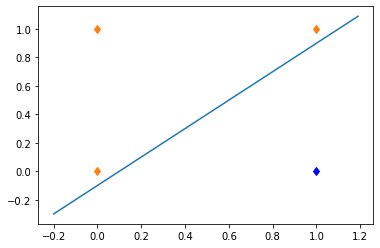

0 x0 x1 dot(x,w)      y
1  0  0        0  False
2  1  0        1   True
3  0  1        1   True
4  1  1        2   True
0 x0 x1 dot(x,w)      y
1  0  0        0  False
2  1  0        1   True
3  0  1        1   True
4  1  1        2   True
0 x0 x1 x2 dot(x,w)      y
1  0  0  0      0.0  False
2  1  0  0      0.6  False
3  0  1  0      0.6  False
4  1  1  0      1.2   True
5  0  0  1      1.1   True
6  1  0  1      1.7   True
7  0  1  1      1.7   True
8  1  1  1      2.3   True
0 x0 x1 x2 dot(x,w)      y
1  0  0  0      0.0  False
2  1  0  0      0.5  False
3  0  1  0     -0.5  False
4  1  1  0      0.0  False
5  0  0  1      0.5  False
6  1  0  1      1.0   True
7  0  1  1      0.0  False
8  1  1  1      0.5  False


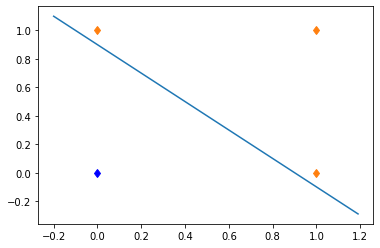

In [34]:
import pandas as pd
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

def logical_unit(x, w, theta):
    _sum = np.dot(x,w)
    out = list(x)
    out.append(_sum)
    out.append((_sum >= theta))
    return out

def table_logical_unit(x_vec, w, theta):
    header = [f'x{i}' for i in range(len(x_vec[0]))]
    header.extend(('dot(x,w)', 'y'))
    table = [header]
    table.extend(logical_unit(x,w,theta) for x in x_vec)
    df = pd.DataFrame(table)
    df.columns = df.iloc[0]
    df = df[1:]
    #df = df.reset_index(drop=True)
    return df

def biconditional():
    header = ["x_1", "x_2", 'y']
    table = [header, [0, 0, True], [1, 0, False], [0, 1, False], [1, 1, True]]
    df = pd.DataFrame(table)
    df.columns = df.iloc[0]
    df = df[1:]
    #df = df.reset_index(drop=True)
    return df

x = np.arange(-0.2, 1.2, 0.01)

def getY2(w,t):
    return (t - w[0]*x)/w[1]

def getY3(w,t):
    return (t - w[0]*x - w[1]*x)/w[2]

x_vec_2input = [[j,i] for i in range(2) for j in range(2)]
x_vec_3input = [[k, j, i] for i in range(2) for j in range(2) for k in range(2)]



# 1

print(table_logical_unit(x_vec_2input,[1,-1],0.1))

y = getY2([1,-1], 0.1)
plt.plot(x,y)
plt.plot([0,0,1],[0,1,1], 'd')
plt.plot([1],[0], 'bd')
plt.show()
# 2

print(table_logical_unit(x_vec_2input,[1,1],0.9))
y = getY2([1,1], 0.9)
plt.plot(x,y)
plt.plot([0],[0], 'bd')
plt.plot([1,0,1],[1,1,0], 'd')
plt.show()


# 3

print(table_logical_unit(x_vec_2input,[1,1],1))
y = getY2([1,1], 0.9)
plt.plot(x,y)
plt.plot([0],[0], 'bd')
plt.plot([1,0,1],[1,1,0], 'd')
plt.show()

# 4

print(table_logical_unit(x_vec_3input,[0.6,0.6,1.1],1))

# 5

print(table_logical_unit(x_vec_3input,[0.5,-0.5,0.5],1))


## Networks of Threshold Logic Units

1. Construct a neural network of threshold logic units that produces the output 1 for points $(x_1, x_2)$ inside of the triangle shown in the sketch and the output 0 for points outside. Hint: Use the biimplication problem and interpret the computations of the threshold logic units in the first layer as a coordinate transformation.

2. Try to find parameters of a threshold logic unit in such a way that it computes the [Exclusive *Or*](https://en.wikipedia.org/wiki/Exclusive_or). What problem does one run into? How can one solve this problem? 

3. [Extra] Determine the parameters wji and $\theta_j$ of the neural network of threshold logic units that is shown in the sketch on the right in such a way that it computes the [Exclusive *Or*](https://en.wikipedia.org/wiki/Exclusive_or) of the Boolean variables $x_1$ and $x_2$.

[XOR](https://drive.google.com/file/d/1NgmaMLRdroAkI00ID9DXcenss4eWHfJk/view?usp=sharing)

this cannot be done, no dividing line can be drawn on the graph below to separate the points


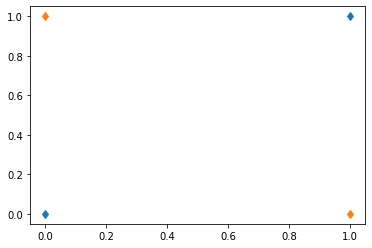

but we can define the neural network to solve the problem
0.0
[0.0, 0.0]
0.0
[1.0, 0.0]
1.0
[0.0, 1.0]
1.0
[1.0, 1.0]
0.0


In [97]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

def neuron(x, w, theta):
    _sum = np.dot(x,w)
    return 1.0 if (_sum > theta) else 0.0

x= np.array([3,1])


# 1
def logAnd(s,v):
    return neuron(np.array([s,v]), [0.5, 0.5], 0.9)

def logNeg(v):
    return neuron(np.array([v]), [-1.0], -0.5)

def triangle(x):
    return logAnd(logAnd(logNeg(neuron(x, np.array([1.,-2.]),-1.)), logNeg(neuron(x, np.array([1.,2.]),7.))), neuron(x, np.array([1.,0.]),1.))

x = np.arange(0, 4, 0.1)


vals = [ [triangle([b,a]) for b in x] for a in x]

plt.imshow(vals)
plt.show()


# 2

print("this cannot be done, no dividing line can be drawn on the graph below to separate the points")
plt.plot([0,1],[0,1], 'd')
plt.plot([1,0],[0,1], 'd')
plt.show()
print("but we can define the neural network to solve the problem")

# 3

def exOr(s,m):
    return neuron([neuron(np.array([s,m]),[-0.5,-0.5], -1), s, m], np.array([1.0,0.25,0.25]),1.2)

x_vec_2input = [[0.0,0.0], [1.0,0.0], [0.0,1.0], [1.0,1.0]]

for el in x_vec_2input:
    print(el)
    print(exOr(*el))
